In [43]:
from MORL_analysis_utils import  plot_grouped_bar_plot, plot_total_sums

from MO_PPO_train_utils import load_saved_data
import itertools
from MORL_analysis_utils import generate_variable_name
from MORL_analysis_utils import plot_multiple_subplots
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
num_episodes_list = [5]
weights_list = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]
results_dir = "training_results_5bus"
seeds = np.arange(0,10)

In [3]:
loaded_data = {}
do_nothing = True
# Loop through all combinations of num_episodes and weights
for num_episodes, weights, seed in itertools.product(num_episodes_list, weights_list, seeds):
    # Load the reward matrix and actions
    reward_matrix, actions, total_steps, params, donothing_reward_matrix, donothing_total_steps = load_saved_data(weights=weights, results_dir=results_dir, seed=seed, num_episodes=num_episodes)
    
    # Generate variable names based on the specifications
    reward_var_name = generate_variable_name("reward_matrix", num_episodes, weights,seed=seed)
    actions_var_name = generate_variable_name("actions", num_episodes, weights,seed=seed)
    total_steps_var_name = generate_variable_name("total_steps", num_episodes, weights, seed=seed)
    if do_nothing == True:
        donothing_reward_var_name = generate_variable_name("donothing_reward_matrix", num_episodes, weights, seed=seed)
        donothing_total_steps_var_name = generate_variable_name("donothing_total_steps", num_episodes, weights, seed=seed)
    
    # Store the data in the dictionary
    loaded_data[reward_var_name] = reward_matrix
    loaded_data[actions_var_name] = actions
    loaded_data[total_steps_var_name] = total_steps
    if do_nothing == True:
        loaded_data[donothing_reward_var_name] = donothing_reward_matrix
        loaded_data[donothing_total_steps_var_name] = donothing_total_steps

Loaded results from training_results_5bus\results_weights_1_0_0_episodes_5_seed_0.npz
Loaded model from training_results_5bus\model_weights_1_0_0_episodes_5_seed_0.pth
Loaded parameters from training_results_5bus\params_weights_1_0_0_episodes_5_seed_0.json
Loaded DoNothing reward matrix from training_results_5bus\DoNothing_reward_matrix_5_episodes_0.npy
Loaded DoNothing total steps from training_results_5bus\DoNothing_total_steps_5_episodes_0.npy
Loaded results from training_results_5bus\results_weights_1_0_0_episodes_5_seed_1.npz
Loaded model from training_results_5bus\model_weights_1_0_0_episodes_5_seed_1.pth
Loaded parameters from training_results_5bus\params_weights_1_0_0_episodes_5_seed_1.json
Loaded DoNothing reward matrix from training_results_5bus\DoNothing_reward_matrix_5_episodes_1.npy
Loaded DoNothing total steps from training_results_5bus\DoNothing_total_steps_5_episodes_1.npy
Loaded results from training_results_5bus\results_weights_1_0_0_episodes_5_seed_2.npz
Loaded model

In [4]:
loaded_data.keys()

dict_keys(['reward_matrix_episodes_5_weights_1_0_0_seed_0', 'actions_episodes_5_weights_1_0_0_seed_0', 'total_steps_episodes_5_weights_1_0_0_seed_0', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_0', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_0', 'reward_matrix_episodes_5_weights_1_0_0_seed_1', 'actions_episodes_5_weights_1_0_0_seed_1', 'total_steps_episodes_5_weights_1_0_0_seed_1', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_1', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_1', 'reward_matrix_episodes_5_weights_1_0_0_seed_2', 'actions_episodes_5_weights_1_0_0_seed_2', 'total_steps_episodes_5_weights_1_0_0_seed_2', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_2', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_2', 'reward_matrix_episodes_5_weights_1_0_0_seed_3', 'actions_episodes_5_weights_1_0_0_seed_3', 'total_steps_episodes_5_weights_1_0_0_seed_3', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_3', 'donothing_total_steps_epi

In [74]:
def normalize_reward_matrix(reward_matrix,total_steps,num_seeds, EpisodeDur: bool=True):#EpisodeDuration: bool = True)
    normalized_reward_matrix = np.zeros_like(reward_matrix)
    for seed in seeds: 
        normalized_reward_matrix[seed] = reward_matrix[seed] / total_steps[seed][:, np.newaxis]
        if EpisodeDur==True: 
            normalized_reward_matrix[seed][:,0] = reward_matrix[seed][:,0]
    return normalized_reward_matrix

In [75]:
loaded_data.keys()

dict_keys(['reward_matrix_episodes_5_weights_1_0_0_seed_0', 'actions_episodes_5_weights_1_0_0_seed_0', 'total_steps_episodes_5_weights_1_0_0_seed_0', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_0', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_0', 'reward_matrix_episodes_5_weights_1_0_0_seed_1', 'actions_episodes_5_weights_1_0_0_seed_1', 'total_steps_episodes_5_weights_1_0_0_seed_1', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_1', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_1', 'reward_matrix_episodes_5_weights_1_0_0_seed_2', 'actions_episodes_5_weights_1_0_0_seed_2', 'total_steps_episodes_5_weights_1_0_0_seed_2', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_2', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_2', 'reward_matrix_episodes_5_weights_1_0_0_seed_3', 'actions_episodes_5_weights_1_0_0_seed_3', 'total_steps_episodes_5_weights_1_0_0_seed_3', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_3', 'donothing_total_steps_epi

In [76]:
loaded_data['reward_matrix_episodes_5_weights_1_0_0_seed_0']

array([[ 1.48809524e-03,  1.29508537e+00,  1.00000000e-01],
       [ 4.46428571e-02,  4.18575042e+01,  8.69000000e+01],
       [ 9.92063492e-04,  0.00000000e+00, -2.00000000e+00],
       [ 0.00000000e+00,  3.80892852e+02,  6.67000000e+02],
       [ 0.00000000e+00,  2.29441072e+02,  3.86900000e+02]])

In [77]:
loaded_data['total_steps_episodes_5_weights_1_0_0_seed_0']

array([   6,  354,    3, 2638, 1943])

In [78]:
loaded_data.keys()
num_seeds=10
seeds = np.arange(0,num_seeds)

reward_matrix_1_0_0 = []
for seed in seeds: 
    name = f"reward_matrix_episodes_5_weights_1_0_0_seed_{seed}"
    reward_matrix_1_0_0.append(loaded_data[name])
reward_matrix_0_1_0 =[]
for seed in seeds: 
    name = f"reward_matrix_episodes_5_weights_0_1_0_seed_{seed}"
    reward_matrix_0_1_0.append(loaded_data[name])
reward_matrix_0_0_1 =[]
for seed in seeds: 
    name = f"reward_matrix_episodes_5_weights_0_0_1_seed_{seed}"
    reward_matrix_0_0_1.append(loaded_data[name])
    

In [79]:
total_steps_1_0_0 = []
for seed in seeds: 
    name = f"total_steps_episodes_5_weights_1_0_0_seed_{seed}"
    total_steps_1_0_0.append(loaded_data[name])
total_steps_0_1_0 =[]
for seed in seeds: 
    name = f"total_steps_episodes_5_weights_0_1_0_seed_{seed}"
    total_steps_0_1_0.append(loaded_data[name])
total_steps_0_0_1 =[]
for seed in seeds: 
    name = f"total_steps_episodes_5_weights_0_0_1_seed_{seed}"
    total_steps_0_0_1.append(loaded_data[name])

In [80]:
reward_matrix_1_0_0[0]

array([[ 1.48809524e-03,  1.29508537e+00,  1.00000000e-01],
       [ 4.46428571e-02,  4.18575042e+01,  8.69000000e+01],
       [ 9.92063492e-04,  0.00000000e+00, -2.00000000e+00],
       [ 0.00000000e+00,  3.80892852e+02,  6.67000000e+02],
       [ 0.00000000e+00,  2.29441072e+02,  3.86900000e+02]])

In [81]:
total_steps_1_0_0

[array([   6,  354,    3, 2638, 1943]),
 array([ 455, 2846, 2105,    6, 1552]),
 array([2378,  264, 2017,    6,  490]),
 array([  15, 1460,    6, 2016, 2898]),
 array([2329, 2220,   15, 1287, 3348]),
 array([ 455, 2019,   10, 2150, 2789]),
 array([ 354,  175, 2019, 2016, 1930]),
 array([ 195, 2097,    6, 2444, 1552]),
 array([  10,  354,    1, 4334, 3874]),
 array([2016, 2017,    3, 3734, 2011])]

In [82]:
normalized_reward_matrices = [normalize_reward_matrix(reward_matrix_1_0_0, total_steps_1_0_0, num_seeds=num_seeds), normalize_reward_matrix(reward_matrix_0_1_0, total_steps_0_1_0, num_seeds=num_seeds), normalize_reward_matrix(reward_matrix_0_0_1, total_steps_0_0_1, num_seeds=num_seeds)]

In [83]:
reward_matrices = [reward_matrix_1_0_0, reward_matrix_0_1_0, reward_matrix_0_0_1]

In [84]:
rewards_dict = {
    'weights_1_0_0': reward_matrix_1_0_0,
    'weights_0_1_0': reward_matrix_0_1_0,
    'weights_0_0_1':reward_matrix_0_0_1
}

In [86]:
normalized_rewards_dict = {
    'weights_1_0_0':normalize_reward_matrix(reward_matrix_1_0_0, total_steps_1_0_0, num_seeds=num_seeds),
    'weights_0_1_0':normalize_reward_matrix(reward_matrix_0_1_0, total_steps_0_1_0, num_seeds=num_seeds),
    'weights_0_0_1':normalize_reward_matrix(reward_matrix_0_0_1, total_steps_0_0_1, num_seeds=num_seeds)
}

settings for loading the files

In [87]:
reward_dim = 3
num_seeds = 10
num_weights = 3

In [88]:
def plot_3d_mean_std(returns_dict):
    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot data for each weight setting
    for weight_setting, returns in returns_dict.items():
        # Calculate the sum of rewards across episodes for each seed
        sum_across_episodes = np.sum(returns, axis=1)  # Shape: [num_seeds, reward_dim]

        # Calculate the mean and standard deviation across seeds for each reward type
        means = np.mean(sum_across_episodes, axis=0)
        std_devs = np.std(sum_across_episodes, axis=0)

        # Plot the mean point
        ax.scatter(means[0], means[1], means[2], s=100, label=f'Mean {weight_setting}', marker='o')

        # Annotate the mean point
        ax.text(means[0], means[1], means[2], 
                f'Mean: ({means[0]:.2f}, {means[1]:.2f}, {means[2]:.2f})', 
                fontsize=9, color='black')

        # Plot error bars for standard deviation
        ax.errorbar(means[0], means[1], means[2], 
                    xerr=std_devs[0], yerr=std_devs[1], zerr=std_devs[2], 
                    fmt='o', capsize=5, label=f'Std Dev {weight_setting}')

    # Adding labels and title
    ax.set_xlabel('Total Reward 1', fontsize=12)
    ax.set_ylabel('Total Reward 2', fontsize=12)
    ax.set_zlabel('Total Reward 3', fontsize=12)
    ax.set_title('Total Sums of Rewards with Mean and Std Deviation', fontsize=14)
    ax.legend()

    plt.show()
# Show plot

In [96]:
reward_dim

3

In [92]:
def plot_mean_std_rewards(returns_dict, reward_dim):
    # Set the overall style of the plots
    
    # Define color palette
    colors = sns.color_palette("husl", len(returns_dict))  # Different colors for each weight setting
    
    reward_dim = reward_dim  # Number of reward dimensions

    # Create subplots for each reward dimension
    fig, axes = plt.subplots(1, reward_dim, figsize=(18, 6), sharex=True, sharey=True)

    if reward_dim == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one reward dimension

    for reward_idx in range(reward_dim):
        ax = axes[reward_idx]
        for (weight_setting, reward_matrix), color in zip(returns_dict.items(), colors):
            # Calculate mean and standard deviation across seeds for each episode
            mean_rewards = np.mean(reward_matrix, axis=0)[:, reward_idx]
            std_rewards = np.std(reward_matrix, axis=0)[:, reward_idx]
            
            num_episodes = mean_rewards.shape[0]

            # Plotting
            ax.errorbar(
                range(num_episodes),
                mean_rewards,
                yerr=std_rewards,
                label=f'Weights {weight_setting}',
                capsize=5,
                marker='o',
                linestyle='--',
                color=color
            )

        ax.set_title(f'Reward {reward_idx + 1}', fontsize=16)
        ax.set_xlabel('Episodes', fontsize=14)
        ax.set_ylabel('Rewards', fontsize=14)
        ax.legend(fontsize=12)
        ax.grid(True)
        sns.despine(trim=True)

    plt.tight_layout()
    plt.show()

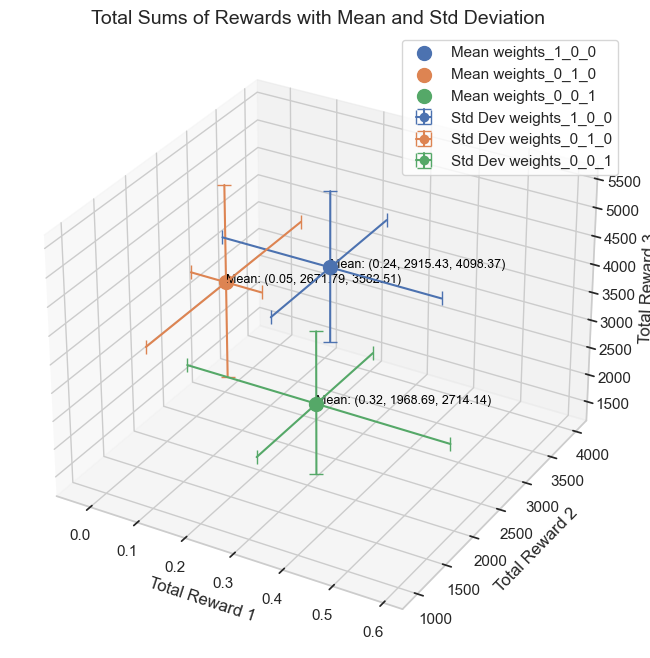

In [95]:
plot_3d_mean_std(returns_dict=rewards_dict)

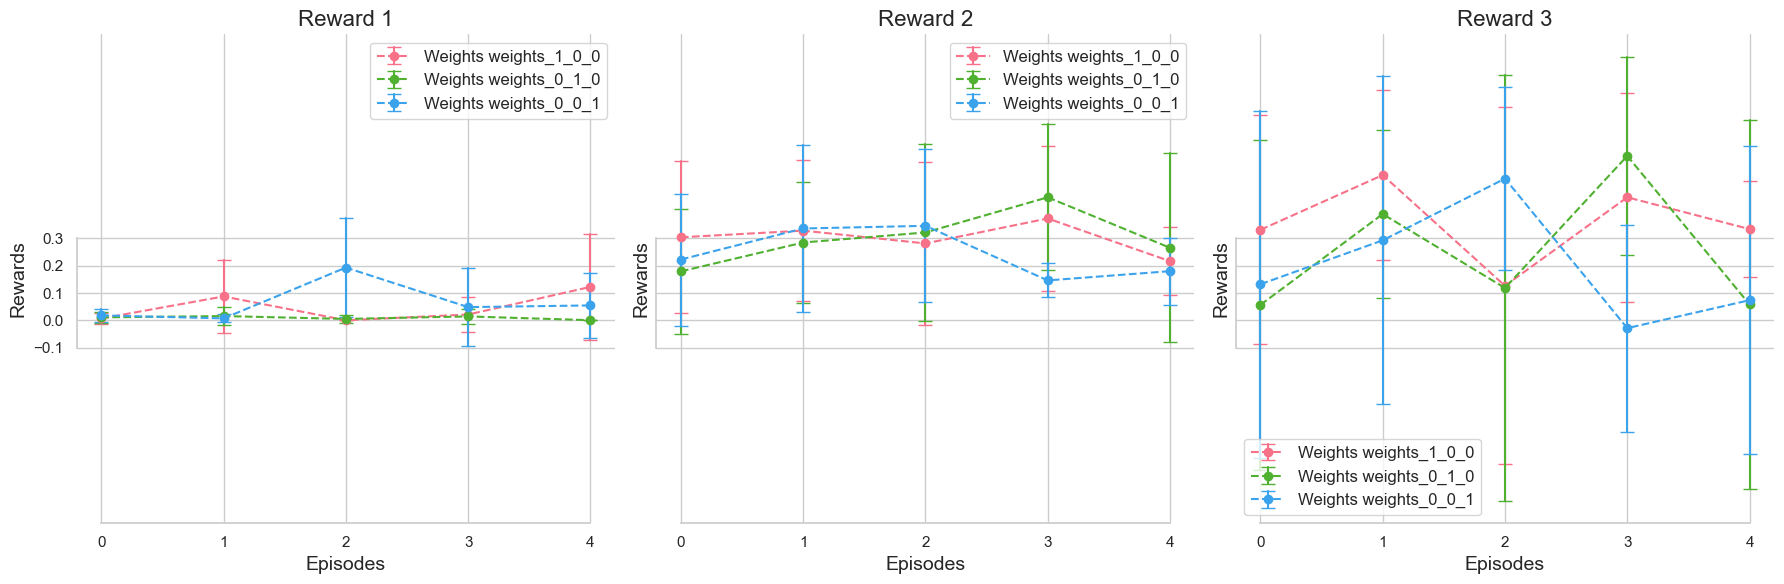

In [97]:
plot_mean_std_rewards(returns_dict=normalized_rewards_dict, reward_dim=reward_dim)

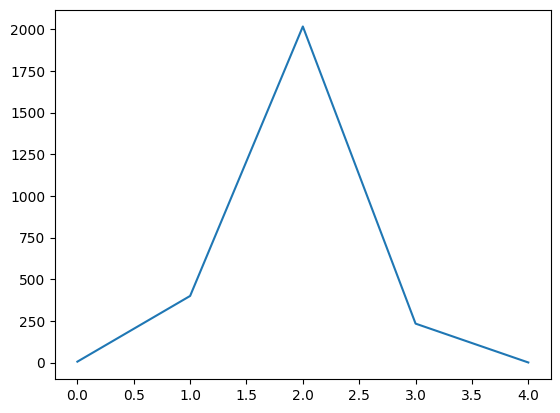

In [41]:
plt.plot(total_steps)

In [ ]:
def get_returns(reward_matrices, num_seeds, num_episodes, reward_dim): 
    return_matrix = np.zeros((num_seeds, reward_dim))
    for seed in range(num_seeds): 
        return_matrix[seed] = reward_matrices[seed].sum(axis=0)
    print(return_matrix)    
    return return_matrix